In [1]:
# Import the dependencies
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import timeit

# # Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key
# Import Dependencies

from datetime import datetime


In [2]:
def latitudes(size):
    
    latitude = []
    x = 0
    while x<size:
        random_lat = random.randint(-90, 89) + random.random()
        latitude.append(random_lat)
        x+=1
    return latitude
# Call the function with 1500
%timeit latitudes(1500)

1.72 ms ± 124 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [3]:
%timeit np.random.uniform(-90.000,90.000,size = 50)
# longitude

3.22 µs ± 248 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [4]:
lats = np.random.uniform(-90.000, 90.000, size =1500)
longs = np.random.uniform(-90.000, 90.000, size =1500)
lat_long = zip(lats, longs)

coordinates = list(lat_long)

In [5]:
# use the tuple() funciton to display the latitude and longitude combination

for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0],coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0],coordinate[1]).country_code)

ushuaia ar
quelimane mz
qurbah tn
victoria sc
bajo baudo co
cape town za
umm kaddadah sd
east london za
klaksvik fo
port alfred za
miandrivazo mg
tabou ci
qaanaaq gl
zaplyusye ru
busselton au
hambantota lk
sao filipe cv
kerch ua
santa cruz de tenerife es
ushuaia ar
burica pa
chuy uy
cervignano del friuli it
karakendzha tj
taolanaro mg
vysokopillya ua
belushya guba ru
chuy uy
taltal cl
qaqortoq gl
losevo ru
tsihombe mg
malwan in
saint-philippe re
jamestown sh
victoria ar
faya td
sokur ru
ushuaia ar
kulhudhuffushi mv
pangnirtung ca
cidreira br
stephenville ca
hithadhoo mv
itacoatiara br
saint anthony ca
mosquera co
karla ee
tazovskiy ru
sitges es
husavik is
dikson ru
bamut ru
dikson ru
cabedelo br
bucak tr
hithadhoo mv
upernavik gl
bambous virieux mu
ndioum sn
ribeira grande pt
nanortalik gl
port alfred za
arraial do cabo br
comodoro rivadavia ar
namibe ao
hithadhoo mv
ushuaia ar
shahpur in
chuy uy
manbij sy
hermanus za
monrovia lr
cape town za
gat ly
tsihombe mg
busselton au
souillac mu

ushuaia ar
galdar es
jamestown sh
busselton au
svetlyy ru
ushuaia ar
lulea se
sur om
imbituba br
barentsburg sj
barentsburg sj
taolanaro mg
kruisfontein za
sumkino ru
bonfim br
punta arenas cl
victoria sc
belushya guba ru
saint-francois gp
lukavica ba
dondo mz
jamestown sh
ushuaia ar
cape town za
comodoro rivadavia ar
ushuaia ar
souillac mu
ayr ca
nanortalik gl
westport ie
soderhamn se
souillac mu
touros br
ust-tsilma ru
ponta do sol cv
nanortalik gl
saint-augustin ca
bathsheba bb
verkhnyaya inta ru
chutove ua
ushuaia ar
mar del plata ar
tasiilaq gl
ushuaia ar
shubarkuduk kz
busselton au
praia da vitoria pt
narsaq gl
vila velha br
matola mz
tunceli tr
ushuaia ar
dikson ru
nouakchott mr
grindavik is
busselton au
letlhakane bw
vestmannaeyjar is
clyde river ca
castro cl
jamestown sh
saint-philippe re
qaanaaq gl
port alfred za
saint-philippe re
shakhtinsk kz
jizan sa
sarab ir
general pico ar
dingle ie
sorland no
samoylovka ru
portobelo pa
inirida co
lugoba tz
prieska za
chapais ca
abha sa


castro cl
ilulissat gl
qaanaaq gl
clyde river ca
qaanaaq gl
pimentel pe
hamilton bm
cape town za
illoqqortoormiut gl
taolanaro mg
barbar sd
aubenas fr
busselton au
tasiilaq gl
buea cm
hofn is
weligama lk
moundsville us
santa isabel do rio negro br
klaksvik fo
torbay ca
hermanus za
ushuaia ar
waslala ni
ushuaia ar
torbay ca
podor sn
aden ye
caravelas br
dingle ie
bredasdorp za
tsihombe mg
saint-philippe re
igarka ru
cape town za
mahebourg mu
taolanaro mg
port elizabeth za
hualmay pe
chuy uy
chita co
dikson ru
souillac mu
mar del plata ar
ilo pe
koulikoro ml
taolanaro mg
tawnat ma
jamestown sh
cidreira br
olafsvik is
ituni gy
khormuj ir
arshan ru
monster nl
ushuaia ar
belushya guba ru
taolanaro mg
chuy uy
hermanus za
boyabat tr
clyde river ca
dikson ru
caravelas br
bredasdorp za
longyearbyen sj
brae gb
jamestown sh
chocen cz
ilulissat gl
touros br
bani walid ly
ushuaia ar
arraial do cabo br
tsihombe mg
vardo no
nantucket us
margate za
ushuaia ar
hermanus za
illoqqortoormiut gl
taolanaro 

In [6]:
# Create a list for holding the ciites
cities = []

#Identify the nearest city for each latitude and longitude combination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0],coordinate[1]).city_name
    
    #If the city is unique, the we add it to the cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


600

In [7]:
# Create an empty list to hold the weather data
city_data = []

# print the beginning of the logging

print("Beginning Data Retrieval      ")
print("------------------------------")

#Create counters

record_count = 1
set_count = 1

Beginning Data Retrieval      
------------------------------


In [8]:
#Starting URL for Weather Map API call

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d82315617a31ae0da2844e056aa6eee6


In [9]:
# Make a 'Get' request for the city weather
city_url = url +"&q=" + city.replace(" ","+")
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [10]:
if city_weather.status_code == 200:
    print(f"City Weather found.")
else: 
    print(f"City Weather not found.")

City Weather found.


In [11]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [12]:
# Create an equal number of latitudes and temperatures.
lats = [42.5, 43.9, 8.1, 36.8, 79.9, 69.1, 25.7, 15.3, 12.7, 64.5]
temps = [80.5, 75.3, 90.9, 90.0, 40.4, 62.3, 85.4, 79.6, 72.5, 72.0]

In [13]:
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(lats, temps)
# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The p-value is: {p_value:.3f}")

y = -0.45x + 92.94
The p-value is: 0.011


In [14]:
# Calculate the regression line "y values" from the slope and intercept.
regress_values = [(lat * slope + intercept) for lat in lats]

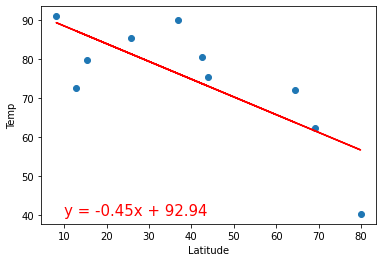

In [15]:
# Import Matplotlib.
import matplotlib.pyplot as plt
# Create a scatter plot of the x and y values.
plt.scatter(lats,temps)
# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(lats,regress_values,"r")
# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (10,40), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Temp')
plt.show()